In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

In [2]:
df = pd.read_csv(r"C:\Users\mudav\Downloads\netflix1.csv")
print("✅ Dataset loaded successfully!")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
df.head()

✅ Dataset loaded successfully!
Rows: 8790, Columns: 10


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [3]:
print("\n📊 Basic Information:")
print(df.info())

print("\n🔍 Missing Values:")
print(df.isnull().sum())


📊 Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB
None

🔍 Missing Values:
show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [4]:
duplicates = df.duplicated().sum()
print(f"\n🧹 Duplicates before cleaning: {duplicates}")

df = df.drop_duplicates()
print(f"✅ Duplicates removed. Remaining rows: {df.shape[0]}")


🧹 Duplicates before cleaning: 0
✅ Duplicates removed. Remaining rows: 8790


In [5]:
df['year_added'] = df['date_added'].str.extract(r'(\d{4})')
df['year_added'] = pd.to_numeric(df['year_added'], errors='coerce')

df['main_country'] = df['country'].apply(lambda x: str(x).split(',')[0])

C:\Users\mudav\AppData\Local\Temp\ipykernel_4020\4178199713.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_count.index, y=type_count.values, palette="coolwarm")


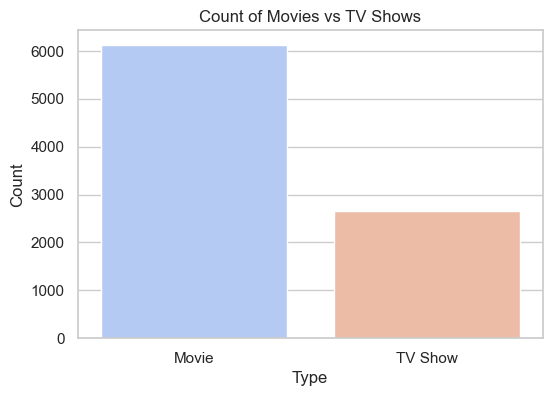

In [6]:
type_count = df['type'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=type_count.index, y=type_count.values, palette="coolwarm")
plt.title("Count of Movies vs TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

C:\Users\mudav\AppData\Local\Temp\ipykernel_4020\2710909384.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")


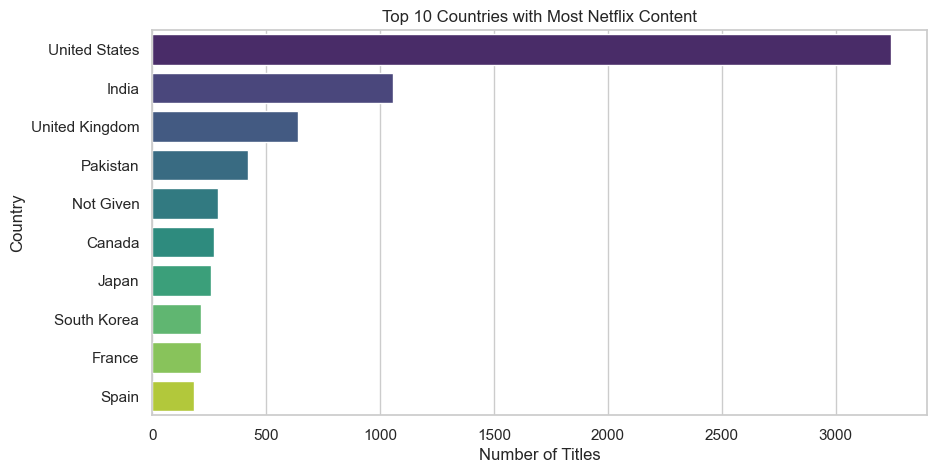

In [7]:
top_countries = df['main_country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Countries with Most Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

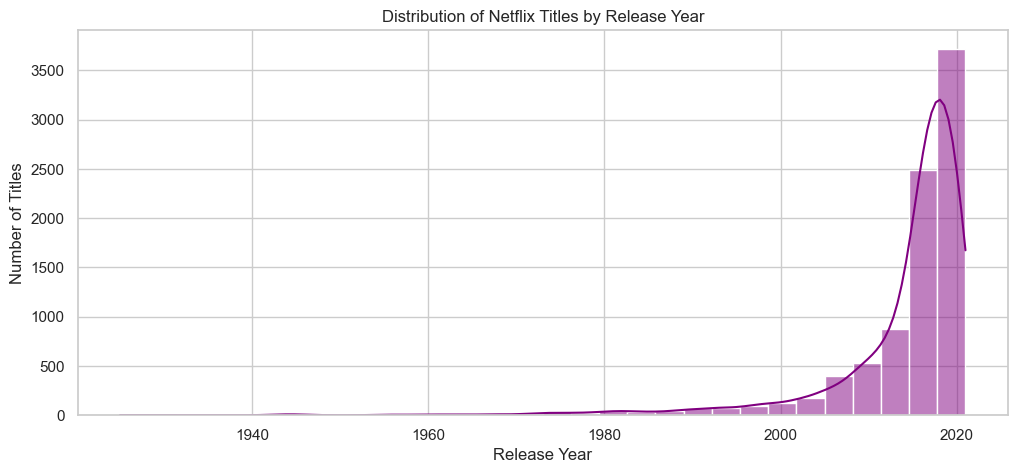

In [8]:
plt.figure(figsize=(12,5))
sns.histplot(df['release_year'], bins=30, kde=True, color='purple')
plt.title("Distribution of Netflix Titles by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()

C:\Users\mudav\AppData\Local\Temp\ipykernel_4020\2708141326.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette="cubehelix")


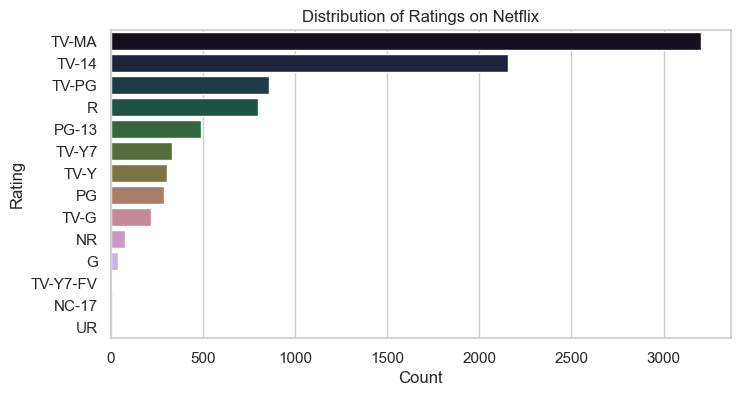

In [9]:
plt.figure(figsize=(8,4))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette="cubehelix")
plt.title("Distribution of Ratings on Netflix")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()

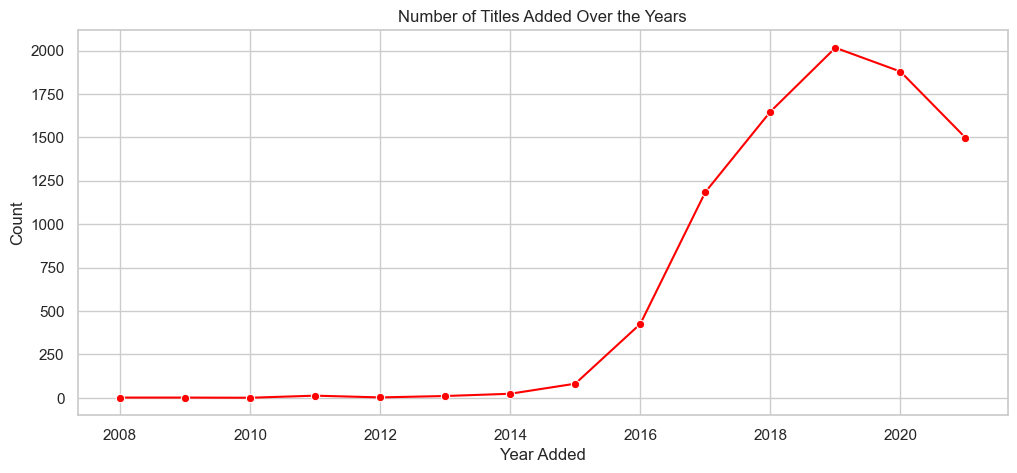

In [10]:
year_added_count = df['year_added'].value_counts().sort_index()
plt.figure(figsize=(12,5))
sns.lineplot(x=year_added_count.index, y=year_added_count.values, marker='o', color='red')
plt.title("Number of Titles Added Over the Years")
plt.xlabel("Year Added")
plt.ylabel("Count")
plt.show()

C:\Users\mudav\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


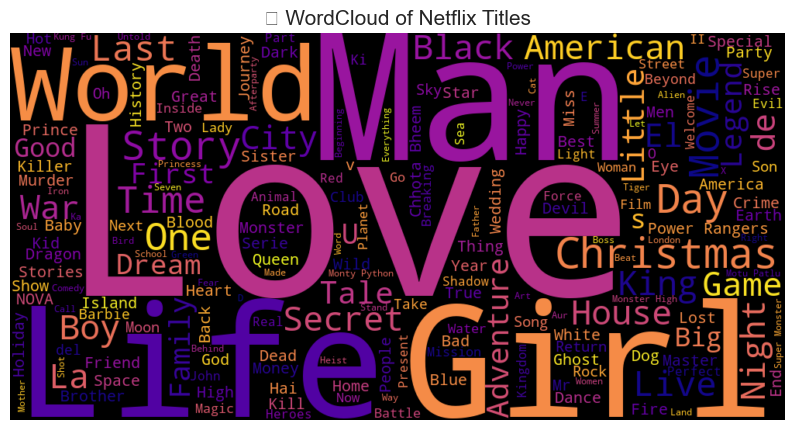

In [11]:
text = " ".join(i for i in df['title'].astype(str))
wordcloud = WordCloud(width=1000, height=500, background_color="black", colormap='plasma').generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("🎬 WordCloud of Netflix Titles", fontsize=15)
plt.show()

In [12]:
print("📈 Key Insights:")
print(f"1️⃣ Total Titles: {len(df)}")
print(f"2️⃣ Movies: {sum(df['type'] == 'Movie')}")
print(f"3️⃣ TV Shows: {sum(df['type'] == 'TV Show')}")
print(f"4️⃣ Most Frequent Country: {df['main_country'].mode()[0]}")
print(f"5️⃣ Most Common Rating: {df['rating'].mode()[0]}")

📈 Key Insights:
1️⃣ Total Titles: 8790
2️⃣ Movies: 6126
3️⃣ TV Shows: 2664
4️⃣ Most Frequent Country: United States
5️⃣ Most Common Rating: TV-MA
